# Pymaceuticals Inc.
---

### Analysis

- There is a strong positive correlation between mouse weight and average tumor volume for the entire Capomulin regimen, with a correlation coefficient of 0.84. The p-value suggests that this correlation is statistically significant. The linear regression analysis indicates a slope of 0.95, intercept of 21.55, and an R-squared value of 0.71. These values indicate a moderately strong relationship between mouse weight and tumor volume.

- Overall, this data provides insights into the relationship between different variables in the study, such as drug regimen, mouse weight, and tumor volume. It allows for further analysis and exploration of the effectiveness of specific drug regimens in treating tumors and understanding the impact of variables on the observed outcomes.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import pprint as pprint 
from scipy.stats import pearsonr, linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_data = pd.merge(mouse_metadata, study_results, on = "Mouse ID")

# Display the data table for preview
combined_data


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
number_of_mice = combined_data["Mouse ID"].nunique()
number_of_mice

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = combined_data[combined_data.duplicated(["Mouse ID", "Timepoint"])]["Mouse ID"].unique()

duplicate_mice

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_data = combined_data.loc[combined_data["Mouse ID"].isin(duplicate_mice)]
duplicate_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by ID
#clean_data = combined_data.drop_duplicates(subset=['Mouse ID', 'Timepoint'], keep='first')
#.loc FIX THIS ^^^^^ TA - Nathan and Bharti Sharma assisted with this
clean_data = combined_data.loc[combined_data['Mouse ID']!="g989"]
# Print the clean DataFrame
clean_data


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice in the clean DataFrame.
number_of_mice_clean_data = clean_data["Mouse ID"].nunique()
number_of_mice_clean_data

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
summary_stats = combined_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(["mean", "median", "var", "std", "sem"])

# Rename the columns for clarity
summary_stats = summary_stats.rename(columns={"mean": "Mean Tumor Volume", "median": "Median Tumor Volume", "var": "Tumor Volume Variance", "std": "Tumor Volume Std. Dev.", "sem": "Tumor Volume Std. Err."})

# Display the summary statistics table
summary_stats

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
# Using the aggregation method, produce the same summary statistics in a single line

summary_stats2 = combined_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(mean = "mean", median = "median", var = "var", std = "std", sem = "sem")
summary_stats2

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

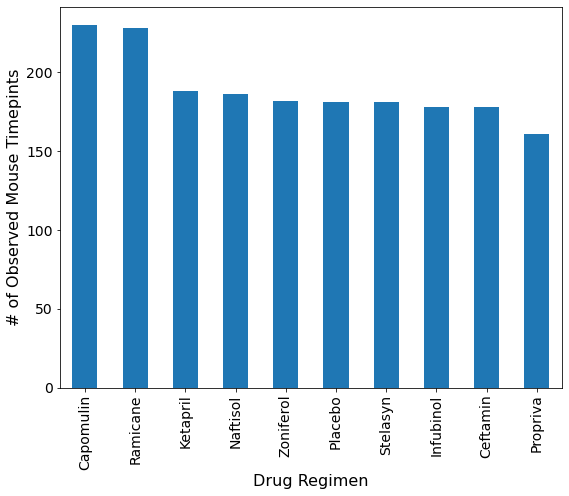

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
drug_counts = combined_data["Drug Regimen"].value_counts()
bar_plot = drug_counts.plot(kind="bar", figsize=(9,7))
plt.xlabel("Drug Regimen", fontsize= 16)
plt.ylabel("# of Observed Mouse Timepints", fontsize= 16)
bar_plot.tick_params(axis="x", labelsize=14)
bar_plot.tick_params(axis="y", labelsize=14)
plt.show()

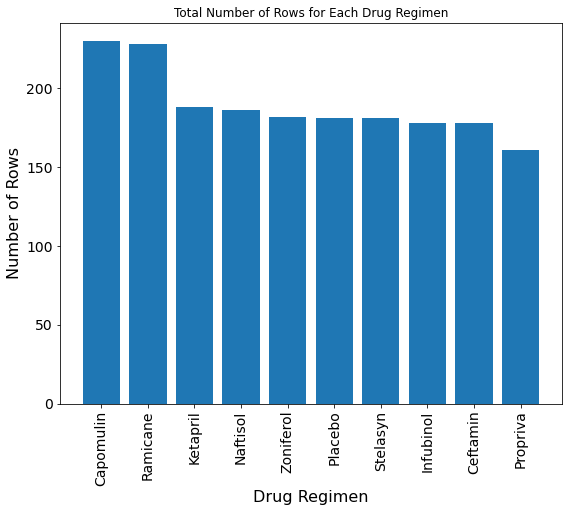

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
# Get the drug regimens and their corresponding counts
regimens = drug_counts.index
counts = drug_counts.values
fig, bar_plot = plt.subplots(figsize=(9,7))
bar_plot.bar(regimens, counts)

bar_plot.set_title("Total Number of Rows for Each Drug Regimen")
bar_plot.set_xlabel("Drug Regimen", fontsize= 16)
bar_plot.set_ylabel("Number of Rows", fontsize= 16)
bar_plot.tick_params(axis="x", labelsize=14)
bar_plot.tick_params(axis="y", labelsize=14)

plt.xticks(rotation=90)
plt.show()


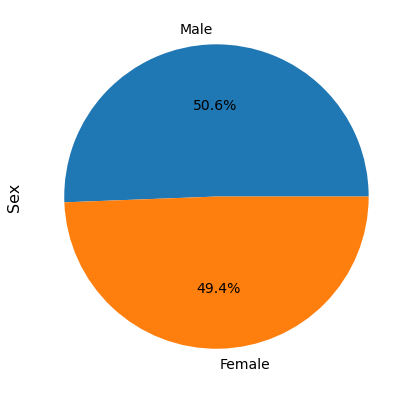

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_counts = combined_data["Sex"].value_counts()

#Create the pie chart/size
fig, ax = plt.subplots(figsize= (7,7))
gender_counts.plot(kind="pie", autopct="%1.1f%%", startangle=0, ax=ax)

#Y Label and font size
ax.set_ylabel("Sex", fontsize= 16)

#Sets the fontsize in the pie chart
ax.set_label("")
for text in ax.texts:
    text.set_fontsize(14)

#Set background color and display
fig.patch.set_facecolor("white")
ax.set_facecolor("white")
plt.show()

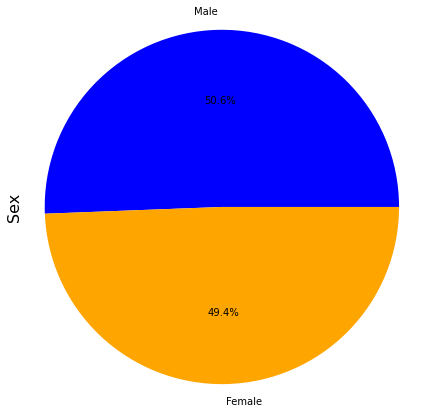

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
#Create labels and sizes for the pie plot
labels = gender_counts.index 
sizes = gender_counts.values
colors = ["blue", "orange"]

# Create the pie plot
pie_plot = plt.pie(sizes, labels=labels, colors=colors, autopct="%1.1f%%", startangle=0)

# Set the aspect ratio to make the pie circular
plt.axis("equal")
plt.gcf().set_size_inches(7,7)

# Set the font size of the labels and percentages
plt.rcParams.update({'font.size': 18})

# Set the background color to white
ax = plt.gca()
ax.set_facecolor('white')

plt.ylabel("Sex", fontsize=16)
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
#First get the last greatest timepoint for each mouse
max_timepoints = combined_data.groupby("Mouse ID")["Timepoint"].max()

#Merge the group df with the original DataFrame
final_tumor_volume = pd.merge(combined_data, max_timepoints, on=["Mouse ID", "Timepoint"])

#Filter the final tumor volume to include the rows where the "Drug Regime" is one of the 4 specificed treatment regimens
treatment_regimens = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
final_tumor_volume = final_tumor_volume[final_tumor_volume["Drug Regimen"].isin(treatment_regimens)]

#This will now contactin the final tumor volume of each mouse across the 4 treatment regimes
final_tumor_volume

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,45,22.050126,1
1,s185,Capomulin,Female,3,17,45,23.343598,1
2,x401,Capomulin,Female,16,15,45,28.484033,0
3,m601,Capomulin,Male,22,17,45,28.430964,1
4,g791,Ramicane,Male,11,16,45,29.128472,1
...,...,...,...,...,...,...,...,...
235,x822,Ceftamin,Male,3,29,45,61.386660,3
237,y163,Infubinol,Female,17,27,45,67.685569,3
241,y769,Ceftamin,Female,6,27,45,68.594745,4
242,y865,Ceftamin,Male,23,26,45,64.729837,3


In [14]:
# The 4 treatment regimens in a list
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create an empty list to fill with tumor vol data
tumor_vol_data = []

#Calculate the IQR and quantitatively determine if there are any potentional outliers
# Locate the rows which contain mice on each drug and get the tumor volumes add subset
# Determine outliers using upper and lower bounds

# Iterate over the treatments
for treatment in treatments:
    # Locate the rows for the current treatment regimen and get the tumor volumes
    tumor_volumes = final_tumor_volume.loc[final_tumor_volume["Drug Regimen"] == treatment, "Tumor Volume (mm3)"]
    
    # Add the tumor volume data to the list
    tumor_vol_data.append(tumor_volumes)
    
    # Calculate the IQR
    iqr = st.iqr(tumor_volumes)
    
    # Calculate the lower and upper bounds
    lower_bound = tumor_volumes.quantile(0.25) - 1.5 * iqr
    upper_bound = tumor_volumes.quantile(0.75) + 1.5 * iqr

    # Determine if there are any outliers
    outliers = tumor_volumes[(tumor_volumes < lower_bound) | (tumor_volumes > upper_bound)]
        
    # Print the treatment regimen and the number of potential outliers
    print(f"Treatment: {treatment}")
    print(f"Number of potential outliers: {outliers.shape[0]}\n")
    
    # Print the details of the potential outliers
    if not outliers.empty:
        print("Potential outliers:")
        print(outliers)
        print()


Treatment: Capomulin
Number of potential outliers: 0

Treatment: Ramicane
Number of potential outliers: 0

Treatment: Infubinol
Number of potential outliers: 1

Potential outliers:
74    36.321346
Name: Tumor Volume (mm3), dtype: float64

Treatment: Ceftamin
Number of potential outliers: 0



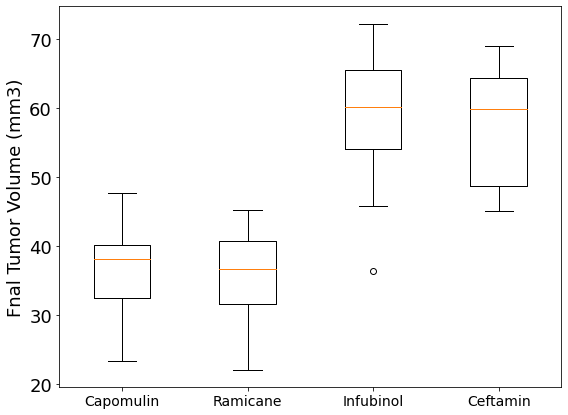

In [15]:
#Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
#Create a list of tumor volumes for each treatment group
tumor_volume_data = [final_tumor_volume.loc[final_tumor_volume["Drug Regimen"] == treatment, "Tumor Volume (mm3)"] for treatment in treatments]

#Create a figure and axis
fig, ax = plt.subplots(figsize=(9,7))
ax.boxplot(tumor_volume_data)

ax.set_xticklabels(treatments, fontsize=14, rotation = 0)
ax.set_ylabel("Fnal Tumor Volume (mm3)")

plt.show()


## Line and Scatter Plots

In [16]:
capomulin_data = combined_data[combined_data["Drug Regimen"] == "Capomulin"]
mouse_ids = capomulin_data["Mouse ID"].unique()
mouse_ids

array(['s185', 'x401', 'm601', 'f966', 'u364', 'y793', 'r554', 'm957',
       't565', 'i738', 'w914', 'g288', 'l897', 'b742', 'b128', 'j246',
       'j119', 'w150', 'v923', 'g316', 's710', 'l509', 'r944', 'i557',
       'r157'], dtype=object)

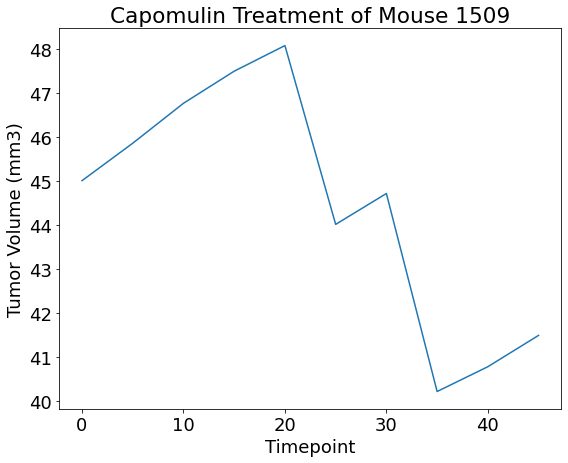

In [17]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
# Select the mouse ID for plotting
mouse_id = "l509" 

# Filter the data for Capomulin treatment and the specified mouse
capomulin_data = combined_data[combined_data["Drug Regimen"] == "Capomulin"]
mouse_data = capomulin_data[capomulin_data["Mouse ID"] == mouse_id]

# Select the time point and tumor volume columns
time_points = mouse_data["Timepoint"]
tumor_volume = mouse_data["Tumor Volume (mm3)"]

# Create the line plot
plt.figure(figsize=(9, 7))
plt.plot(time_points, tumor_volume)

# Set the x-axis and y-axis labels
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")

# Set the plot title
plt.title(f"Capomulin Treatment of Mouse 1509")

# Display the plot
plt.show()


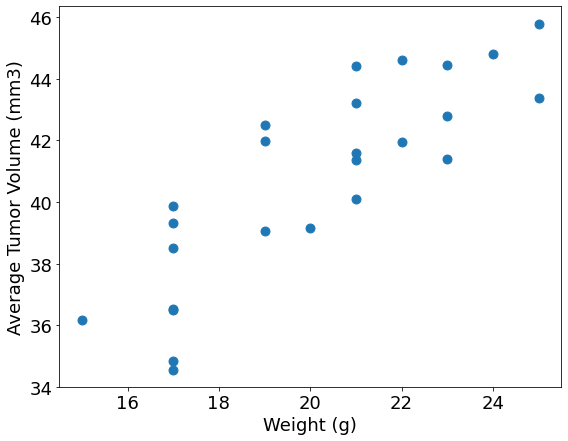

In [18]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
# Calculate the average tumor volume for each mouse
average_tumor_volume = capomulin_data.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()

# Get the corresponding weight for each mouse
mouse_weight = capomulin_data.groupby("Mouse ID")["Weight (g)"].first()

# Create the scatter plot
plt.figure(figsize=(9, 7))
plt.scatter(mouse_weight, average_tumor_volume, s=80)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()


## Correlation and Regression

In [19]:
# Calculate the correlation coefficient
correlation, p_value = pearsonr(mouse_weight, average_tumor_volume)
print("The correlation between mouse weight and the average tumor volume is", correlation)
print("p-value:", p_value)

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(mouse_weight, average_tumor_volume)

print("Linear Regression:")
print("Slope:", slope)
print("Intercept:", intercept)
print("R-squared:", r_value**2)
print("p-value:", p_value)
print("Standard Error:", std_err)

The correlation between mouse weight and the average tumor volume is 0.841936342469472
p-value: 1.3225722434712483e-07
Linear Regression:
Slope: 0.9544396890241049
Intercept: 21.552160532685008
R-squared: 0.7088568047708723
p-value: 1.3225722434712404e-07
Standard Error: 0.12754359033201323


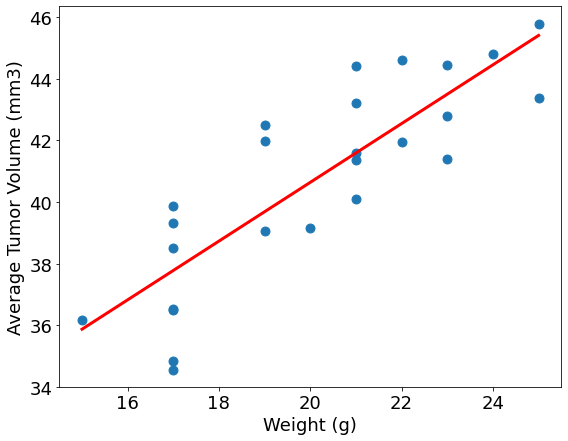

In [20]:
#Create scatter plot
plt.figure(figsize=(9, 7))
plt.scatter(mouse_weight, average_tumor_volume,s=80)

# Add the linear regression line
x = np.linspace(min(mouse_weight), max(mouse_weight), 100)
y = slope * x + intercept
plt.plot(x, y, color='red', linewidth=3)

#Labels and Display
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()